In [1]:
!git clone https://github.com/SysBioChalmers/DLKcat

fatal: destination path 'DLKcat' already exists and is not an empty directory.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install numpy requests torch torchvision rdkit-pypi sklearn

In [3]:
import json
import csv

with open('/content/DLKcat/DeeplearningApproach/Data/database/Kcat_combination_0918_wildtype_mutant.json') as json_file:
  json_data=json.load(json_file)

datafile=open('/content/DLKcat/jasonoutput.csv','w',newline='')
csv_writer=csv.writer(datafile)

count = 0
for data in json_data:
	if count == 0:
		header = data.keys()
		csv_writer.writerow(header)
		count += 1
	csv_writer.writerow(data.values())

datafile.close()


In [4]:
import pandas as pd

In [5]:
kcatdata=pd.read_csv('/content/DLKcat/jasonoutput.csv')
kcatdata.head(10)

,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Value,Unit
0,4.2.3.4,Actinidia chinensis,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,wildtype,20.1000,s^(-1)
1,4.2.3.4,Aspergillus nidulans,C(C(C(C(COP(=O)([O-])[O-])O)O)O)C(=O)C(=O)[O-],3-deoxy-D-arabino-heptulosonate 7-phosphate,MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,wildtype,6.8000,s^(-1)
2,4.2.3.4,Neurospora crassa,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,wildtype,19.0000,s^(-1)
3,2.1.1.255,Streptomyces coelicolor,C[S+](CCC(C(=O)[O-])N)CC1C(C(C(O1)N2C=NC3=C(N=...,S-Adenosyl-L-methionine,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0075,s^(-1)
4,2.1.1.255,Streptomyces coelicolor,CC(=CCCC(=C(C)COP(=O)(O)OP(=O)(O)O)C)C,(E)-2-Methylgeranyl diphosphate,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0390,s^(-1)
5,1.2.1.65,Pseudomonas sp.,C1=CC=C(C=C1)C=O,Benzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,26.4000,s^(-1)
6,1.2.1.65,Pseudomonas sp.,C1=CC(=CC=C1C=O)[N+](=O)[O-],p-Nitrobenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,59.0000,s^(-1)
7,1.2.1.65,Pseudomonas sp.,C1=CC(=CC(=C1)Cl)C=O,3-Chlorobenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,65.0000,s^(-1)
8,1.2.1.65,Pseudomonas sp.,C1=CC=C(C(=C1)C=O)O,o-Hydroxybenzaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,93.6000,s^(-1)
9,1.2.1.65,Pseudomonas sp.,C1=CC=C2C=C(C=CC2=C1)C=O,2-Naphthaldehyde,MKTKLFINNAWIDSSDQQTFERIHPVSSDVVTESANATVTDAIKAA...,wildtype,96.0000,s^(-1)


In [6]:
print(kcatdata.info())
print(kcatdata.describe())
print(kcatdata['Value'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ECNumber   17010 non-null  object 
 1   Organism   17010 non-null  object 
 2   Smiles     17010 non-null  object 
 3   Substrate  17010 non-null  object 
 4   Sequence   17010 non-null  object 
 5   Type       17010 non-null  object 
 6   Value      17010 non-null  float64
 7   Unit       17010 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.0+ MB
None
              Value
count  1.701000e+04
mean   1.523864e+03
std    2.942021e+04
min    0.000000e+00
25%    4.400000e-01
50%    4.400000e+00
75%    3.810000e+01
max    2.010000e+06
2010000.0


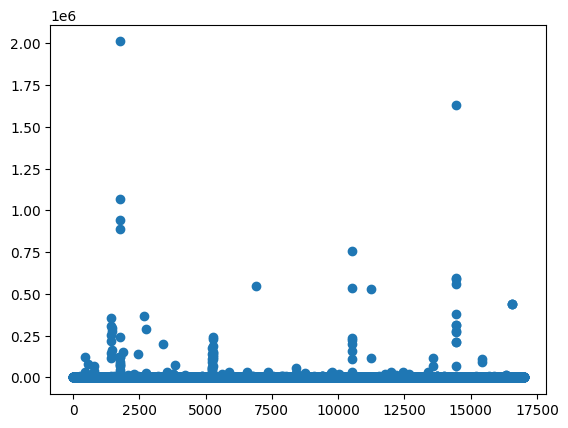

In [7]:
import matplotlib.pyplot as plt
plt.scatter(kcatdata.index,kcatdata['Value'])

In [8]:
print(len(kcatdata[kcatdata['Value']>30000])),len(kcatdata)

90


(None, 17010)

In [9]:
kcatdata_reduced=kcatdata[kcatdata['Value']<30000]

In [10]:
kcatdata_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16920 entries, 0 to 17009
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ECNumber   16920 non-null  object 
 1   Organism   16920 non-null  object 
 2   Smiles     16920 non-null  object 
 3   Substrate  16920 non-null  object 
 4   Sequence   16920 non-null  object 
 5   Type       16920 non-null  object 
 6   Value      16920 non-null  float64
 7   Unit       16920 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [11]:
kcatdata_reduced['Value'].max()

29900.0

In [12]:
kcatdata_reduced.reset_index()


,index,ECNumber,Organism,Smiles,Substrate,Sequence,Type,Value,Unit
0,0,4.2.3.4,Actinidia chinensis,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,wildtype,20.1000,s^(-1)
1,1,4.2.3.4,Aspergillus nidulans,C(C(C(C(COP(=O)([O-])[O-])O)O)O)C(=O)C(=O)[O-],3-deoxy-D-arabino-heptulosonate 7-phosphate,MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,wildtype,6.8000,s^(-1)
2,2,4.2.3.4,Neurospora crassa,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,3-deoxy-D-arabino-heptulosonic acid 7-phosphate,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,wildtype,19.0000,s^(-1)
3,3,2.1.1.255,Streptomyces coelicolor,C[S+](CCC(C(=O)[O-])N)CC1C(C(C(O1)N2C=NC3=C(N=...,S-Adenosyl-L-methionine,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0075,s^(-1)
4,4,2.1.1.255,Streptomyces coelicolor,CC(=CCCC(=C(C)COP(=O)(O)OP(=O)(O)O)C)C,(E)-2-Methylgeranyl diphosphate,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0390,s^(-1)
...,...,...,...,...,...,...,...,...,...
16915,17005,1.1.1.82,Zea mays,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,NADPH,MGLSTVYSPAGPRLVPAPLGRCRSAQPRRPRRAPLATVRCSVDATK...,wildtype,955.0000,s^(-1)
16916,17006,1.1.1.82,Zea mays,C(C(C(=O)O)O)C(=O)O,L-Malate,MGLSTVYSPAGPRLVPAPLGRCRSAQPRRPRRAPLATVRCSVDATK...,wildtype,2.9000,s^(-1)
16917,17007,1.1.1.82,Zea mays,C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)(O)OP(=O)(O...,NADP+,MGLSTVYSPAGPRLVPAPLGRCRSAQPRRPRRAPLATVRCSVDATK...,wildtype,2.9000,s^(-1)
16918,17008,1.1.1.82,Spinacia oleracea,C(C(C(=O)O)O)C(=O)O,L-Malate,MAVAELSPCYQTQIVKPPHLSWLSNNHKLNLLGLPKASRITEICCS...,wildtype,6.7000,s^(-1)


In [13]:
kcatdata_reduced.drop(['ECNumber','Substrate','Unit'],axis=1,inplace=True)

<ipython-input-13-e0c35fc99a0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcatdata_reduced.drop(['ECNumber','Substrate','Unit'],axis=1,inplace=True)


In [14]:
kcatdata_reduced.head()

,Organism,Smiles,Sequence,Type,Value
0,Actinidia chinensis,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,wildtype,20.1000
1,Aspergillus nidulans,C(C(C(C(COP(=O)([O-])[O-])O)O)O)C(=O)C(=O)[O-],MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,wildtype,6.8000
2,Neurospora crassa,C(C(C(C(COP(=O)(O)O)O)O)O)C(=O)C(=O)O,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,wildtype,19.0000
3,Streptomyces coelicolor,C[S+](CCC(C(=O)[O-])N)CC1C(C(C(O1)N2C=NC3=C(N=...,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0075
4,Streptomyces coelicolor,CC(=CCCC(=C(C)COP(=O)(O)OP(=O)(O)O)C)C,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,wildtype,0.0390


In [15]:
dummy_type=pd.get_dummies(kcatdata_reduced['Type'],drop_first=True)
kcatdata_reduced=pd.concat([kcatdata_reduced,dummy_type],axis=1)

kcatdata_reduced.drop('Type',axis=1,inplace=True)



In [16]:
kcatdata['Organism'].nunique()

857

In [17]:
dummy_organism=pd.get_dummies(kcatdata_reduced['Organism'],drop_first=True)
kcatdata_reduced=pd.concat([kcatdata_reduced,dummy_organism],axis=1)



In [18]:
kcatdata_reduced.drop('Organism',axis=1,inplace=True)



In [ ]:
!pip install rdkit

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors

encoded_df=pd.DataFrame()

for idx,row in kcatdata.iterrows():
    smiles=row['Smiles']
    mol=Chem.MolFromSmiles(smiles)

    descriptors = {}

    # Calculate the desired molecular descriptors
    descriptors['MolLogP'] = Descriptors.MolLogP(mol)
    descriptors['MolWt'] = Descriptors.MolWt(mol)
    descriptors['NumRotatableBonds'] = Descriptors.NumRotatableBonds(mol)

    # Add the descriptors to the encoded DataFrame
    encoded_df = encoded_df.append(descriptors, ignore_index=True)

kcatdata_reduced=pd.concat([kcatdata_reduced,encoded_df],axis=1)

#xkcat_encoded.head()


Streaming output truncated to the last 5000 lines.
<ipython-input-19-8cc0712b709e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(descriptors, ignore_index=True)
<ipython-input-19-8cc0712b709e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(descriptors, ignore_index=True)
<ipython-input-19-8cc0712b709e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(descriptors, ignore_index=True)
<ipython-input-19-8cc0712b709e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(descriptors, ignore_index=True)
<ipython-inpu

In [20]:
kcatdata_reduced.drop('Smiles',axis=1,inplace=True)
#xkcat_encoded.head()

In [21]:
kcatdata_reduced.head()

,Sequence,Value,wildtype,Abies grandis,Acanthamoeba polyphaga mimivirus,Acetoanaerobium sticklandii,Acetobacter aceti,Acetobacter xylinus,Acholeplasma laidlawii,Achromobacter lyticus,...,Zobellia galactanivorans,Zoogloea ramigera,Zymomonas mobilis,uncultured archaeon,uncultured bacterium HF130_AEPn_1,uncultured marine bacterium,unknown prokaryotic organism,MolLogP,MolWt,NumRotatableBonds
0,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,20.1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.7778,288.145,8.0
1,MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,6.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.3765,285.121,8.0
2,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,19.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.7778,288.145,8.0
3,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,0.0075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.2569,398.445,7.0
4,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,0.0390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2955,328.238,8.0


In [22]:
kcatdata_reduced.shape

(17010, 856)

In [ ]:
!pip install transformers

In [23]:
import tensorflow as tf
from transformers import TFBertTokenizer,TFBertModel
import re
from tqdm import tqdm


In [ ]:
tf.__version__

In [ ]:
pip install -U tensorflow-text==2.12.0


In [24]:
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', lower=False)
  tokenizer.fit_on_texts(kcatdata['Sequence'])
  bertmodel=TFBertModel.from_pretrained("Rostlab/prot_bert",from_pt=True)
  bertmodel.trainable=False

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [25]:

  embedding_list=[]
  import numpy as np

  for idx,row in tqdm(kcatdata_reduced.iterrows(),total=len(kcatdata_reduced)):
        sequence_Example = ' '.join(row["Sequence"])
        sequence_Example = re.sub(r"[UZOB]", "X", sequence_Example)
        print('epoch:',idx)

        encoded_sequence = tokenizer.texts_to_sequences([sequence_Example])
        input_ids = tf.keras.preprocessing.sequence.pad_sequences(encoded_sequence, maxlen=512, padding='post')
        with tf.device('/GPU:1'):
           outputs = bertmodel(input_ids)
           embedding_list.append(outputs.pooler_output.numpy())



Output hidden; open in https://colab.research.google.com to view.

In [33]:
import numpy as np

reshaped_data = np.reshape(embedding_list, (16920, 1024))

In [35]:
def convert_to_dense_columns(features_array):
    df = pd.DataFrame(features_array)
    df.columns = ['Feature_' + str(x) for x in df.columns]
    return df

seq_feat_df = convert_to_dense_columns(reshaped_data)

In [36]:
kcatdata_new= pd.concat([kcatdata_reduced,seq_feat_df],axis=1)

In [37]:
kcatdata_new.head()

,Sequence,Value,wildtype,Abies grandis,Acanthamoeba polyphaga mimivirus,Acetoanaerobium sticklandii,Acetobacter aceti,Acetobacter xylinus,Acholeplasma laidlawii,Achromobacter lyticus,...,Feature_1014,Feature_1015,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023
0,MAAFSLSAKQILSPSTHRPSLSKTTTADSSLRFRNPHSLSLRCSSL...,20.1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
1,MSNPTKISILGRESIIADFGLWRNYVAKDLISDCSSTTYVLVTDTN...,6.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
2,MAEPISNPTRINILGKDNIIIDHGIWLNFVAQDLLQNIKSSTYILI...,19.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
3,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,0.0075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
4,MTTETTTATATAKIPAPATPYQEDIARYWNNEARPVNLRLGDVDGL...,0.0390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875


In [39]:
kcatdata_new.drop('Sequence',axis=1,inplace=True)

In [42]:
file_path = '/content/drive/MyDrive/kcatdata/kcat_bert_data.csv'
kcatdata_new.to_csv(file_path, index=False)

In [43]:
df=pd.read_csv('/content/drive/MyDrive/kcatdata/kcat_bert_data.csv')
df.head()

,Value,wildtype,Abies grandis,Acanthamoeba polyphaga mimivirus,Acetoanaerobium sticklandii,Acetobacter aceti,Acetobacter xylinus,Acholeplasma laidlawii,Achromobacter lyticus,Achromobacter xylosoxidans,...,Feature_1014,Feature_1015,Feature_1016,Feature_1017,Feature_1018,Feature_1019,Feature_1020,Feature_1021,Feature_1022,Feature_1023
0,20.1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
1,6.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
2,19.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
3,0.0075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875
4,0.0390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218362,-0.210596,0.222933,-0.220846,-0.219133,-0.205354,0.211036,0.21421,0.199832,-0.218875


In [ ]:
#from google.colab import drive
import shutil

# Mount Google Drive
#drive.mount('/content/drive')

# Specify the source and destination file paths
source_file_path = '/content/kcat.csv'
destination_file_path = '/content/drive/MyDrive/kcatdata/kcat.csv'

# Copy the file to Google Drive
shutil.copyfile(source_file_path, destination_file_path)